In [68]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
#plt.style.use('fivethirtyeight')

In [69]:
%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import math
from sklearn.metrics import mean_squared_error
from random import random
import datetime

In [70]:
df = pd.read_excel("/content/patan_final.xlsx")

In [71]:

df.head()

,Date,Arrival,Price
0,2010-01-01,84.8,2755.0
1,2010-01-02,75.8,2750.0
2,2010-01-03,80.3,2752.5
3,2010-01-04,87.4,2750.0
4,2010-01-05,122.1,2770.0


In [72]:
df.describe()

,Date,Arrival,Price
count,5438,5438.000000,5438.000000
mean,2017-06-11 12:00:00,328.830241,4505.713616
min,2010-01-01 00:00:00,0.230000,2450.000000
25%,2013-09-21 06:00:00,135.543976,3650.000000
50%,2017-06-11 12:00:00,240.200000,4150.000000
75%,2021-03-01 18:00:00,429.172500,5382.666667
max,2024-11-20 00:00:00,2241.800000,7615.000000
std,NaN,296.937523,1161.928912


Autoregressive Integrated Moving Averages
STEPS:
1. Visualize the Time Series Data
2. Make the time series data stationary
3. Plot the Correlation and AutoCorrelation Charts
4. Construct the ARIMA Model or Seasonal ARIMA based on the data
5. Use the model to make predictions

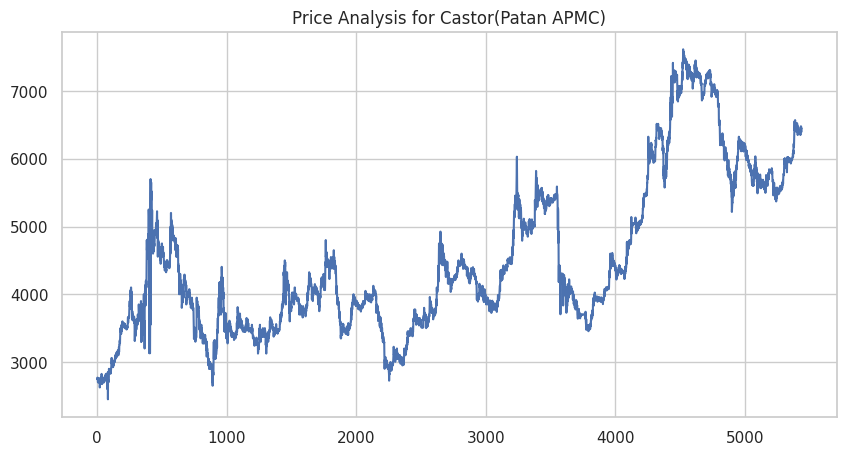

In [73]:
# Visualize
plt.figure(figsize=(10, 5))
plt.plot(df['Price'])
plt.title('Price Analysis for Castor(Patan APMC)')
plt.grid(True)
plt.show()

### Testing For Stationarity

In [74]:
#H0
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Price'])

In [75]:
test_result

(-1.7279350826860138,
 0.41677998192014853,
 28,
 5409,
 {'1%': -3.431559540776716,
  '5%': -2.862074495126272,
  '10%': -2.5670545108744043},
 63159.62039410306)

In [76]:
#H1
from statsmodels.tsa.stattools import adfuller
test_result1=adfuller(df['Price'].diff().dropna())
test_result1

(-11.781348606851545,
 1.0330943009571233e-21,
 33,
 5403,
 {'1%': -3.431560884603653,
  '5%': -2.8620750888414417,
  '10%': -2.5670548269288087},
 63148.50808057397)

#Ho: It is non stationary
#H1: It is stationary

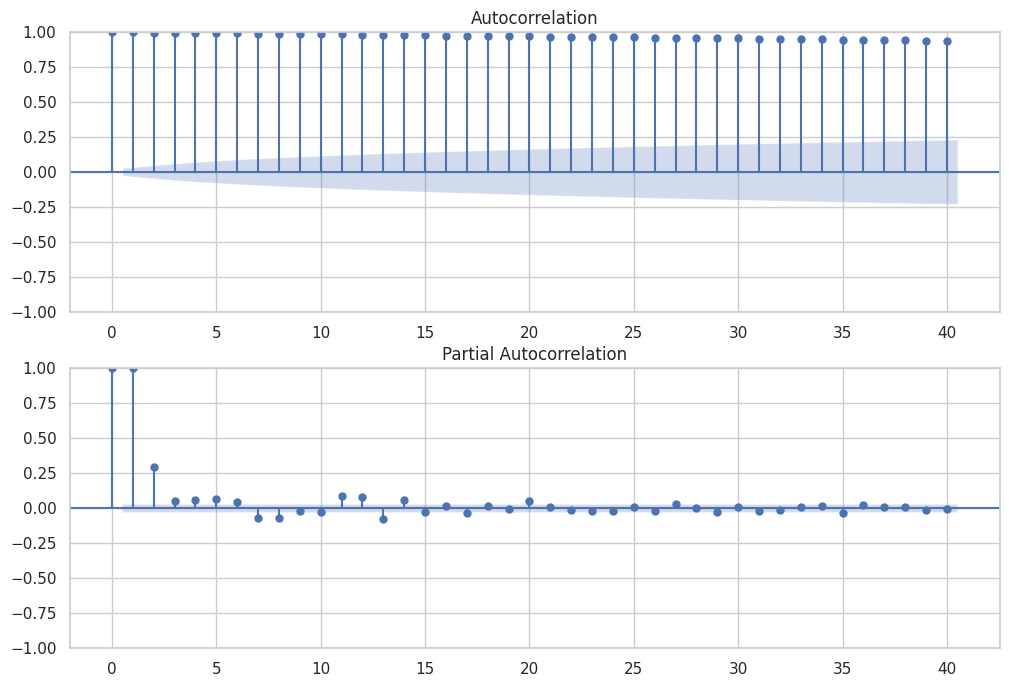

In [77]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Price'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price'], lags=40, ax=ax2)
plt.show()

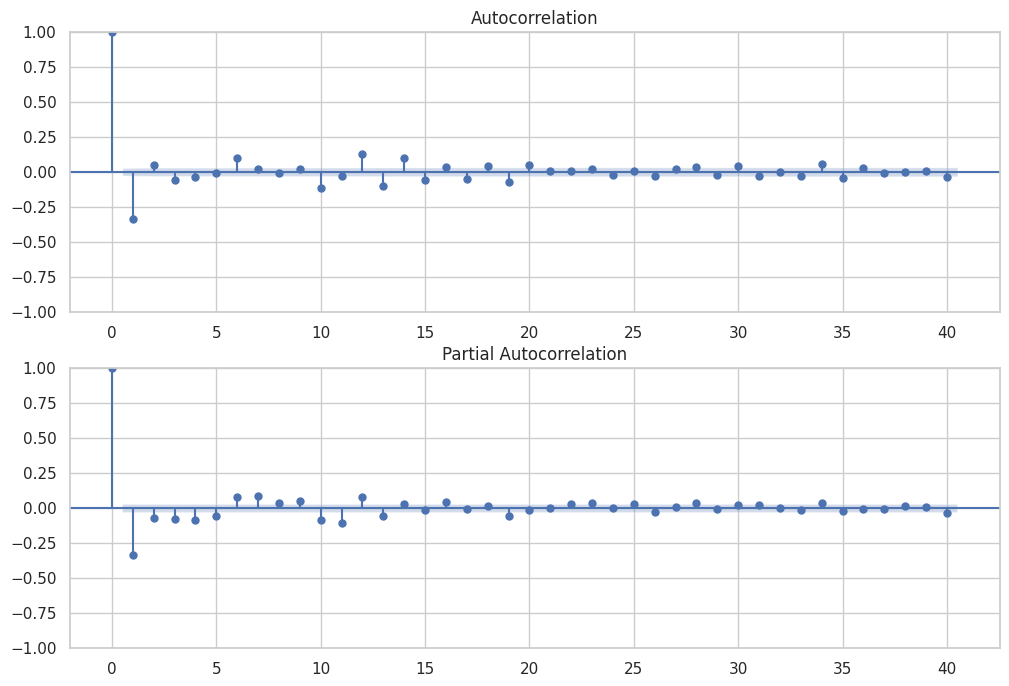

In [78]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#Plots with first order differenced Sales variable
fig = sm.graphics.tsa.plot_acf(df['Price'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price'].diff().dropna(), lags=40, ax=ax2)
plt.show()

In [79]:
X = df['Price']
X = X.values
# Split the data into training and testing sets (e.g., 70% train, 30% test)
train_size = int(len(X) * 0.8)
train_data_new = X[:train_size]
test_data_new = X[train_size:]

In [80]:
!pip install pmdarima

In [81]:
from pmdarima.arima import auto_arima

In [82]:
arima_model =  auto_arima(train_data_new,start_p=0, d=1, start_q=0,
                          max_p=3, max_d=3, max_q=3, start_P=0,
                          D=1, start_Q=0, max_P=3, max_D=3,
                          max_Q=3, m=1, seasonal=False,
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=52109.364, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=51557.948, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=51503.434, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=52107.694, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=51504.863, Time=1.70 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=51505.082, Time=2.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=51503.275, Time=5.98 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=51508.527, Time=10.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=51475.912, Time=5.02 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=51474.327, Time=1.30 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=51473.523, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=51504.153, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=51475.132, Time=0.76 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=51502.388, Time=1.56 sec

Best model:  ARIM

In [83]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4350
Model:               SARIMAX(0, 1, 3)   Log Likelihood              -25732.762
Date:                Wed, 27 Nov 2024   AIC                          51473.523
Time:                        11:42:53   BIC                          51499.034
Sample:                             0   HQIC                         51482.528
                               - 4350                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3891      0.003   -137.511      0.000      -0.395      -0.384
ma.L2          0.0409      0.003     13.388      0.000       0.035       0.047
ma.L3         -0.0841      0.004    -23.299      0.000      -0.091      -0.077
sigma2      8062.7280     30.966    260.373      0.000    8002.036    8123.420
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1687010.35
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                            -2.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        99.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

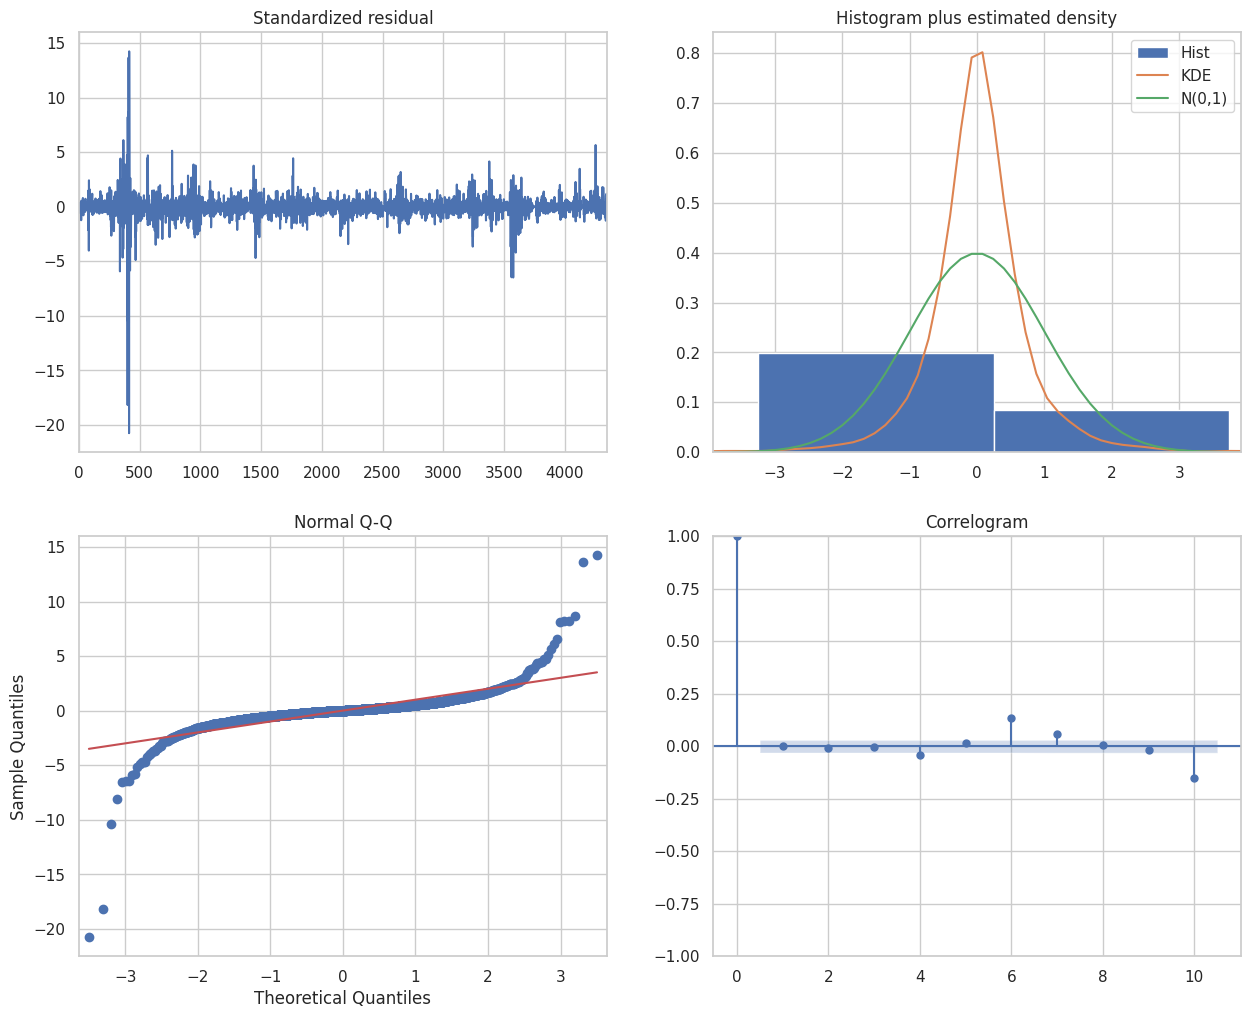

In [84]:
arima_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [85]:
train_data_new = pd.DataFrame({'Date': df['Date'][:train_size], 'Price': train_data_new})
test_data_new = pd.DataFrame({'Date': df['Date'][train_size:], 'Price': test_data_new})

In [86]:
train_data_new

,Date,Price
0,2010-01-01,2755.000000
1,2010-01-02,2750.000000
2,2010-01-03,2752.500000
3,2010-01-04,2750.000000
4,2010-01-05,2770.000000
...,...,...
4345,2021-11-24,6440.000000
4346,2021-11-25,6410.000000
4347,2021-11-26,6385.000000
4348,2021-11-27,6450.000000


In [87]:
df['Date'] = pd.to_datetime(df['Date'])

In [88]:
from datetime import timedelta

In [89]:
# Make predictions on the training data
train_predictions_new, _ = arima_model.predict_in_sample(return_conf_int=True)

# Store the training predictions with dates
train_predictions_df_new = pd.DataFrame({'Date': train_data_new['Date'], 'Predicted_Price': train_predictions_new})
train_predictions_df_new.set_index('Date', inplace=True)

# Make predictions on the test data
test_predictions_new, conf_int =arima_model.predict(n_periods=len(test_data_new), return_conf_int=True)

# Store the test predictions with dates
test_predictions_df_new = pd.DataFrame({'Date': test_data_new['Date'], 'Predicted_Price': test_predictions_new})
test_predictions_df_new.set_index('Date', inplace=True)

# Forecast 10 steps ahead
forecast_steps = 100
forecast_new, conf_int_forecast =arima_model.predict(n_periods=forecast_steps, return_conf_int=True)

# Create a DataFrame for the forecasted values with future dates
future_dates = pd.date_range(df['Date'].max() + timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df_new = pd.DataFrame({'Date': future_dates, 'Forecasted_Price': forecast_new})
forecast_df_new.set_index('Date', inplace=True)

In [90]:
test_predictions_df_new

,Predicted_Price
Date,
2021-11-29,6424.382766
2021-11-30,6418.937688
2021-12-01,6420.146863
2021-12-02,6420.146863
2021-12-03,6420.146863
...,...
2024-11-16,6420.146863
2024-11-17,6420.146863
2024-11-18,6420.146863


In [91]:
forecast_df_new

,Forecasted_Price
Date,
2024-11-21,6424.382766
2024-11-22,6418.937688
2024-11-23,6420.146863
2024-11-24,6420.146863
2024-11-25,6420.146863
...,...
2025-02-24,6420.146863
2025-02-25,6420.146863
2025-02-26,6420.146863


In [92]:
forecast_df_new.shape

(100, 1)

In [93]:
train_data_new['Date'] = pd.to_datetime(train_data_new['Date'])
test_data_new['Date'] = pd.to_datetime(test_data_new['Date'])
train_predictions_df_new.index = pd.to_datetime(train_predictions_df_new.index)
test_predictions_df_new.index = pd.to_datetime(test_predictions_df_new.index)
forecast_df_new.index = pd.to_datetime(forecast_df_new.index)

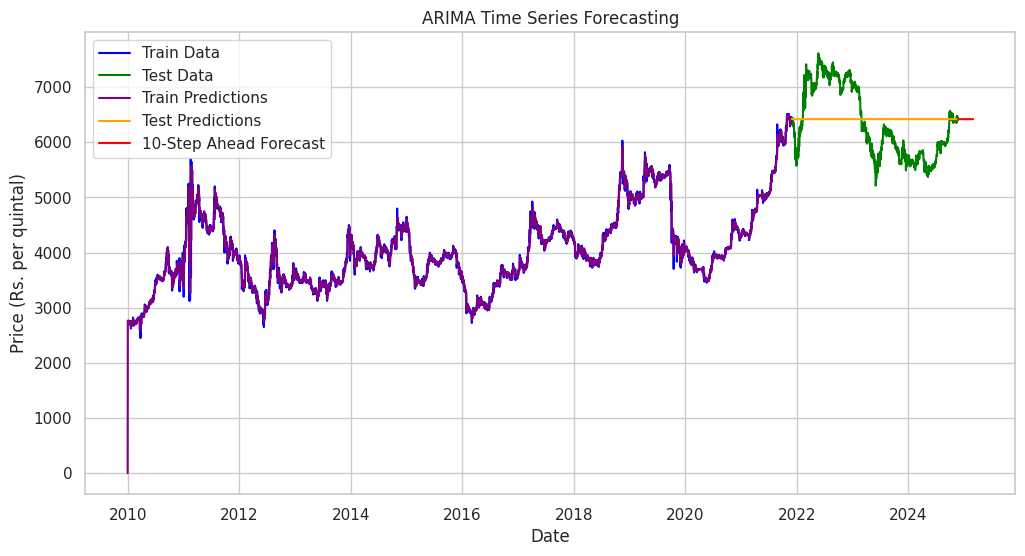

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_new['Date'], train_data_new['Price'], label='Train Data', color='blue')
plt.plot(test_data_new['Date'], test_data_new['Price'], label='Test Data', color='green')
plt.plot(train_predictions_df_new.index, train_predictions_df_new['Predicted_Price'], label='Train Predictions', color='purple')
plt.plot(test_predictions_df_new.index, test_predictions_df_new['Predicted_Price'], label='Test Predictions', color='orange')
plt.plot(forecast_df_new.index, forecast_df_new['Forecasted_Price'], label='10-Step Ahead Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price (Rs. per quintal)')
plt.legend()
plt.title('ARIMA Time Series Forecasting')
plt.grid(True)
plt.show()

In [95]:
test_predictions_df_new

,Predicted_Price
Date,
2021-11-29,6424.382766
2021-11-30,6418.937688
2021-12-01,6420.146863
2021-12-02,6420.146863
2021-12-03,6420.146863
...,...
2024-11-16,6420.146863
2024-11-17,6420.146863
2024-11-18,6420.146863


In [96]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

rmse_auto_arima=math.sqrt(mean_squared_error(test_predictions_df_new['Predicted_Price'],test_data_new['Price']))
print('Mean value of price is : {}. Root Mean Squared Error is :{}'.format(mean(test_data_new['Price']),rmse_auto_arima))

Mean value of price is : 6343.692662377451. Root Mean Squared Error is :648.2407440023112


In [97]:
from sklearn.metrics import mean_squared_error
y_true = test_data_new["Price"]
y_pred = test_predictions_df_new

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculate the range of the target variable
y_range = np.max(y_true) - np.min(y_true)

# Calculate the RMSE as a percentage of the range
rmse_percentage = (rmse / y_range) * 100

print(f'Root Mean Squared Error (MSE) : {mse:.2f}')
print(f'Root Mean Squared Error (RMSE) : {rmse:.2f}')
print(f'Root Mean Squared Error (RMSE) as a percentage of the range: {rmse_percentage:.2f}%')

Root Mean Squared Error (MSE) : 420216.06
Root Mean Squared Error (RMSE) : 648.24
Root Mean Squared Error (RMSE) as a percentage of the range: 27.01%


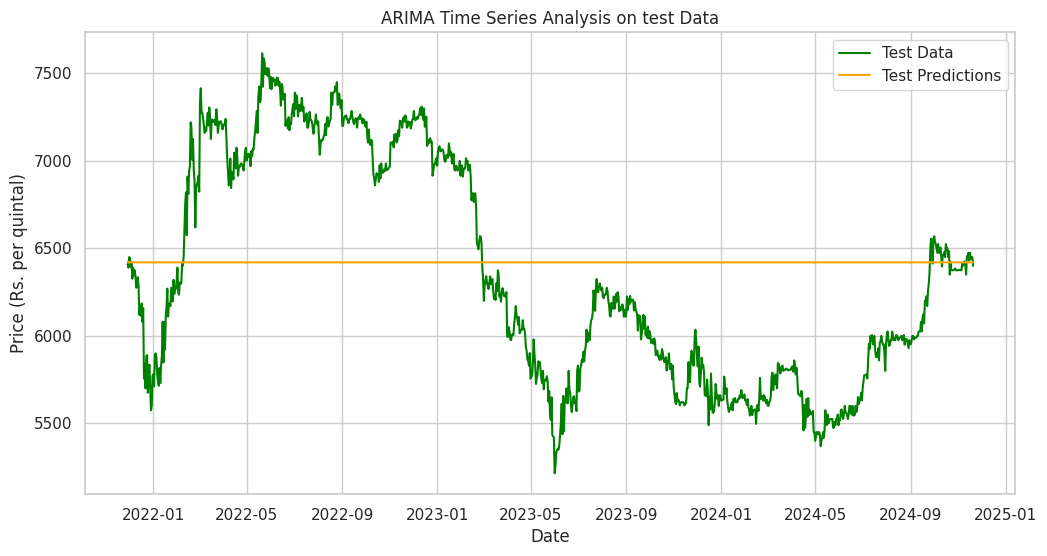

In [99]:
plt.figure(figsize=(12, 6))
plt.plot(test_data_new['Date'], test_data_new['Price'], label='Test Data', color='green')
plt.plot(test_predictions_df_new.index, test_predictions_df_new['Predicted_Price'], label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('Price (Rs. per quintal)')
plt.legend()
plt.title('ARIMA Time Series Analysis on test Data')
plt.show()